In [95]:
import torch
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Local PC로 실습하는 경우 실행 x / 단 작업경로를 "LGES_240621"로 맞춰주기
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/LGES_240621

#### Pytorch 기본 연산 단위 : Tensor

In [2]:
print(f'pytorch tensor : {torch.tensor([1,2,3,4,5]).dtype}')
print(f'pytorch tensor : {torch.tensor([1.0,2.0,3.0,4.0,5.0]).dtype}')

pytorch tensor : torch.int64
pytorch tensor : torch.float32


In [3]:
a = [1,2,3,4,5]

a_long = torch.LongTensor(a)  

a_float = torch.FloatTensor(a)

print(f'pytorch 기본 정수 데이터 타입 {a_long.dtype} | 텐서 타입 {a_long.type()}')
print(f'pytorch 기본 실수 데이터 타입 {a_float.dtype} | 텐서 타입 {a_float.type()}')

pytorch 기본 정수 데이터 타입 torch.int64 | 텐서 타입 torch.LongTensor
pytorch 기본 실수 데이터 타입 torch.float32 | 텐서 타입 torch.FloatTensor


#### Data type 변경방법

In [4]:
a = torch.LongTensor([1,2,3,4,5])
print(f'변경 전 data type : {a.dtype}')
print(f'변경 후 data type : {a.type(torch.FloatTensor).dtype}')
print(f'변경 후 data type : {a.float().dtype}')

변경 전 data type : torch.int64
변경 후 data type : torch.float32
변경 후 data type : torch.float32


#### numpy to tensor / tensor to numpy

In [5]:
# numpy to tensor
a = np.array([1,2,3,4,5])
print(torch.from_numpy(a).type())
print(torch.tensor(a).type())
print(torch.LongTensor(a).type())

torch.IntTensor
torch.IntTensor
torch.LongTensor


In [6]:
# tensor to numpy
a = torch.LongTensor([1,2,3,4,5])
print(type(a.numpy()))

<class 'numpy.ndarray'>


#### CPU & GPU

In [7]:
# GPU를 사용할 수 있는지 없는지 확인
torch.cuda.is_available()

True

In [8]:
# tensor의 위치 확인
a = torch.FloatTensor([1,2,3,4,5])
a.device

device(type='cpu')

In [9]:
# CPU to GPU
print(a.cuda().device)
print(a.to('cuda:0').device)
print(a.to(0).device)

cuda:0
cuda:0
cuda:0


In [10]:
# GPU to CPU
a = torch.FloatTensor([1,2,3,4,5]).to(0)
print(f'{a.device} to {a.cpu().device}')
print(f'{a.device} to {a.to("cpu").device}')

cuda:0 to cpu
cuda:0 to cpu


In [11]:
# 텐서의 위치가 다르면 에러 발생
a = torch.FloatTensor([1,2,3,4,5]).to(0)
a + a.cpu()

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

#### Tensor 조작하기
##### 1. index를 활용한 데이터 선택

In [15]:
a = torch.randn(size=(3,3))
a

tensor([[ 0.2128, -1.6369, -1.8496],
        [-1.1867, -1.2031, -1.3822],
        [-1.9396, -0.4415, -0.6837]])

In [16]:
a.shape

torch.Size([3, 3])

In [19]:
# index를 활용한 (i,j) element 선택
i=1
j=1
print(a[i,j])

tensor(-1.2031)


In [22]:
a = torch.randn(size=(3,3,3))
a

tensor([[[-0.2358, -2.0760, -0.6386],
         [-0.9602,  0.2159, -0.7593],
         [ 2.2493,  0.9363, -0.8679]],

        [[-2.0693,  0.7575, -0.0078],
         [-0.2872, -1.2883,  0.1776],
         [-0.9169, -0.1998, -0.0668]],

        [[-0.6867,  1.9519, -1.0889],
         [-0.6369,  0.0868,  0.6003],
         [-0.3439,  0.4993, -1.3923]]])

In [23]:
# index를 활용한 (i,j,h) element 선택
print(a[1,1,1])

tensor(-1.2883)


In [31]:
# 특정 부분만 선택
a = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9]])
a

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [32]:
a.shape

torch.Size([3, 3])

In [34]:
# [1,2]
# [4,5]
print(a[0:2,0:2])

tensor([[1, 2],
        [4, 5]])


In [37]:
# [1,2,3]
# [4,5,6]
print(a[0:2,0:3])
print(a[0:2,:])

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])


#### Tabular Dataset에서 활용

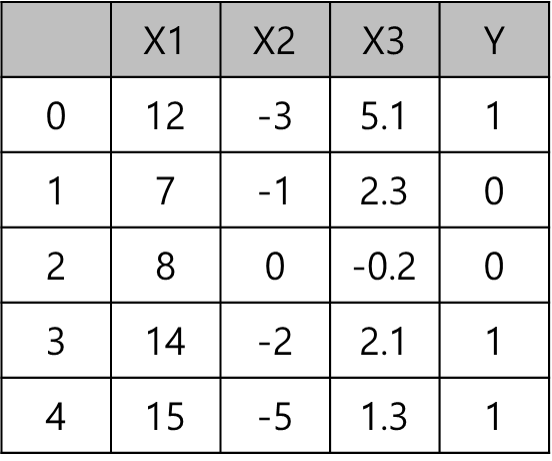

In [1]:
from PIL import Image
Image.open('./images/img1-1.png')

In [40]:
# tabular dataset에서 활용
X = torch.tensor([[12, -3, 5.1],
                  [ 7, -1, 2.3],
                  [ 8,  0,-0.2],
                  [14, -2, 2.1],
                  [15, -5, 1.3]])
y = torch.tensor([1,0,0,1,1])
print(X.shape, y.shape) # 샘플 차원, 변수 차원

torch.Size([5, 3]) torch.Size([5])


In [41]:
# X1만 선택
X1 = X[:,0]
print(X1)

tensor([12.,  7.,  8., 14., 15.])


In [43]:
# 1~3번째 샘플만 선택
print(X[1:4,:])

tensor([[ 7.0000, -1.0000,  2.3000],
        [ 8.0000,  0.0000, -0.2000],
        [14.0000, -2.0000,  2.1000]])


In [44]:
# 1~3번째 샘플 중 X2와 X3선택
print(X[1:4,1:])

tensor([[-1.0000,  2.3000],
        [ 0.0000, -0.2000],
        [-2.0000,  2.1000]])


In [45]:
# 1,3,4번째 샘플 선택
print(X[[1,3,4]])

tensor([[ 7.0000, -1.0000,  2.3000],
        [14.0000, -2.0000,  2.1000],
        [15.0000, -5.0000,  1.3000]])


#### Multivariate Time-Series Dataset에서 활용

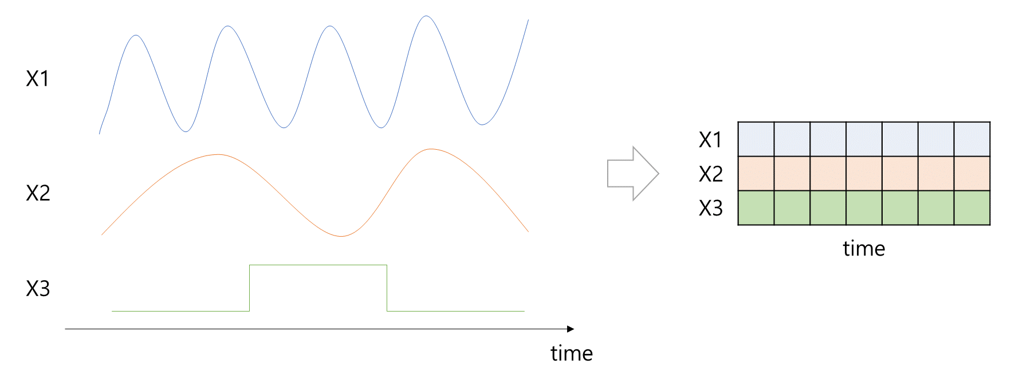

In [2]:
Image.open('./images/img1-2.png')

In [49]:
time_data = torch.randn(size=(10,3,100))
time_data.shape # 샘플 차원, 변수 차원, 시간 차원

torch.Size([10, 3, 100])

In [51]:
# 특정 간격으로 뽑고 싶을 때
time_data[:,:,::2].shape

torch.Size([10, 3, 50])

##### 2. 특정 조건을 만족하는 데이터 선택

In [52]:
# 특정 조건을 만족하는 element 선택 -> 특정 조건을 만족하는지 만족하지 않는지 True False mask를 만들어야 함
# ex1) 클래스가 5인 x만을 선택
x = torch.randn(size=(32,5)) # 특징(X)이 5개 있는 입력 변수 32개 생성
labels = torch.randint(0,6,size=(32,)) # 0~5의 class를 가지는 출력 변수 32개 생성
print(labels)
print((labels==5).sum())


tensor([2, 4, 0, 1, 0, 3, 3, 5, 3, 1, 3, 4, 5, 1, 3, 1, 1, 4, 1, 0, 3, 0, 5, 3,
        1, 2, 0, 2, 0, 3, 4, 5])
tensor(4)


In [53]:
mask = labels == 5
print(mask)

print(x[mask])
print(x[mask].shape)

tensor([False, False, False, False, False, False, False,  True, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False,  True])
tensor([[ 0.5587, -0.2907, -1.5638, -0.2247,  0.5269],
        [-1.2671,  1.1135, -0.2124, -0.3123,  0.4597],
        [ 0.1684,  1.3944, -1.6097, -1.7131, -2.2836],
        [ 1.4933,  0.2580,  0.8293,  1.2801,  2.8128]])
torch.Size([4, 5])


In [54]:
# mask를 만드는 방법
print(labels==5)
print(torch.where(labels==5,True,False))
print(labels.eq(5))

# 참고 : element-wise compairsion function / 두 텐서간 비교도 가능

# torch.ne = not_equal
# torch.eq = equal
# torch.ge = greater_equal
# torch.le = less_equal
# torch.greater
# torch.less

tensor([False, False, False, False, False, False, False,  True, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False,  True])
tensor([False, False, False, False, False, False, False,  True, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False,  True])
tensor([False, False, False, False, False, False, False,  True, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False,  True])


In [55]:
# 다중조건 mask를 만드는 방법
print((labels>=3) & (labels<=5))
print(torch.mul(labels>=3,labels<=5))

tensor([False,  True, False, False, False,  True,  True,  True,  True, False,
         True,  True,  True, False,  True, False, False,  True, False, False,
         True, False,  True,  True, False, False, False, False, False,  True,
         True,  True])
tensor([False,  True, False, False, False,  True,  True,  True,  True, False,
         True,  True,  True, False,  True, False, False,  True, False, False,
         True, False,  True,  True, False, False, False, False, False,  True,
         True,  True])


##### 3.특정 조건을 만족하는 데이터의 인덱스 얻기

In [56]:
x = torch.randn(size=(32,5))
labels = torch.randint(0,6,size=(32,))
print(labels)
print((labels==5).sum())

mask = labels==5
print(mask)

tensor([5, 2, 2, 0, 5, 0, 5, 3, 2, 4, 1, 1, 5, 0, 1, 2, 1, 0, 2, 3, 2, 0, 1, 1,
        0, 5, 1, 3, 0, 3, 4, 3])
tensor(5)
tensor([ True, False, False, False,  True, False,  True, False, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False, False,
        False, False])


In [57]:
print(torch.nonzero(mask))

tensor([[ 0],
        [ 4],
        [ 6],
        [12],
        [25]])


#### 텐서 연산

##### 1. 통계량 계산

In [58]:
a = torch.FloatTensor([[1,2,3],
                       [4,5,6],
                       [7,8,9]])
a

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [59]:
# sum, mean, max, min, std
print(torch.sum(a)) # a.sum()
print(torch.mean(a)) # a.mean()
print(torch.std(a)) # a.std()
print(torch.max(a)) # a.max()
print(torch.min(a)) # a.min()

tensor(45.)
tensor(5.)
tensor(2.7386)
tensor(9.)
tensor(1.)


In [60]:
# 특정 dimension을 기준으로 계산
print(torch.sum(a, dim=0))
print(torch.mean(a, dim=0))
print(torch.std(a, dim=0))
print(torch.max(a, dim=0)) # 최대값과 최대값 인덱스를 같이 반환
print(torch.min(a, dim=0)) # 최소값과 최소값 인덱스를 같이 반환

tensor([12., 15., 18.])
tensor([4., 5., 6.])
tensor([3., 3., 3.])
torch.return_types.max(
values=tensor([7., 8., 9.]),
indices=tensor([2, 2, 2]))
torch.return_types.min(
values=tensor([1., 2., 3.]),
indices=tensor([0, 0, 0]))


##### 2. element-wise 연산

In [61]:
a = torch.FloatTensor([1,2,3,4,5,6])
b = torch.FloatTensor([4,5,6,7,8,9])

In [62]:
print(f'상수항 더하기 : {a + 1}')
print(f'상수항 곱하기 : {a * 2}')

상수항 더하기 : tensor([2., 3., 4., 5., 6., 7.])
상수항 곱하기 : tensor([ 2.,  4.,  6.,  8., 10., 12.])


In [63]:
print(f'두 텐서 간 element-wise 더하기 : {a + b}')
print(f'두 텐서 간 element-wise 곱하기 : {a * b}')

두 텐서 간 element-wise 더하기 : tensor([ 5.,  7.,  9., 11., 13., 15.])
두 텐서 간 element-wise 곱하기 : tensor([ 4., 10., 18., 28., 40., 54.])


In [64]:
print(f'함수를 활용한 element-wise 더하기 : {torch.add(a,1)}')
print(f'함수를 활용한 element-wise 더하기 : {torch.add(a,b)}')
print(f'함수를 활용한 element-wise 곱하기 : {torch.mul(a,2)}')
print(f'함수를 활용한 element-wise 곱하기 : {torch.mul(a,b)}')
# 나누기 = torch.div
# 제곱 = torch.pow
# 지수 = torch.exp
# 로그 = torch.log


함수를 활용한 element-wise 더하기 : tensor([2., 3., 4., 5., 6., 7.])
함수를 활용한 element-wise 더하기 : tensor([ 5.,  7.,  9., 11., 13., 15.])
함수를 활용한 element-wise 곱하기 : tensor([ 2.,  4.,  6.,  8., 10., 12.])
함수를 활용한 element-wise 곱하기 : tensor([ 4., 10., 18., 28., 40., 54.])


In [65]:
# 특정 dimension만 더하고 싶으면 해당 dimension의 data를 선택한 후 변경
a = torch.FloatTensor([[1,2,3],
                       [4,5,6],
                       [7,8,9]])

b = torch.FloatTensor([[11,12,13],
                       [14,15,16],
                       [17,18,19]])

a[:,0] = a[:,0] + b[:,0]

print(a)

tensor([[12.,  2.,  3.],
        [18.,  5.,  6.],
        [24.,  8.,  9.]])


##### 3. 벡터/행렬 연산

In [66]:
# 두 벡터 간 내적 외적
a = torch.tensor([1,2,3,4])
b = torch.tensor([2,3,4,5])
c = torch.dot(a,b)
print(c) # tensor(40)

d = torch.outer(a,b)
print(d)

tensor(40)
tensor([[ 2,  3,  4,  5],
        [ 4,  6,  8, 10],
        [ 6,  9, 12, 15],
        [ 8, 12, 16, 20]])


In [67]:
# 벡터, 행렬 전치
a = torch.FloatTensor([[1,2,3],
                       [4,5,6],
                       [7,8,9]])
print(a.t()) # a.T

tensor([[1., 4., 7.],
        [2., 5., 8.],
        [3., 6., 9.]])


In [68]:
# 행렬곱
a = torch.randint(1,10, size=(5,4))
b = torch.randint(1,10, size=(6,4))
print(a)
print(b)


tensor([[8, 8, 9, 6],
        [1, 2, 6, 1],
        [2, 6, 1, 2],
        [8, 1, 6, 1],
        [6, 7, 3, 6]])
tensor([[6, 8, 5, 7],
        [5, 9, 5, 6],
        [1, 9, 7, 4],
        [5, 5, 4, 8],
        [5, 2, 3, 6],
        [7, 4, 3, 7]])


In [69]:
#matmul은 행렬-벡터 간 연산 가능, mm은 행렬-행렬만 지원
c = torch.matmul(a,b.t()) # torch.mm(a,b.T)

print(c)
print(c.shape) # c.size()

tensor([[199, 193, 167, 164, 119, 157],
        [ 59,  59,  65,  47,  33,  40],
        [ 79,  81,  71,  60,  37,  55],
        [ 93,  85,  63,  77,  66,  85],
        [149, 144, 114, 125,  89, 121]])
torch.Size([5, 6])


##### 4. 텐서 결합/분해하기

In [70]:
a = torch.FloatTensor([[1,2,3],
                       [4,5,6],
                       [7,8,9]])

b = torch.FloatTensor([[11,12,13],
                       [14,15,16],
                       [17,18,19]])

row_cat = torch.cat((a,b),dim=0)
col_cat = torch.cat((a,b),dim=1)

print(row_cat, row_cat.shape)
print(col_cat, col_cat.shape)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [11., 12., 13.],
        [14., 15., 16.],
        [17., 18., 19.]]) torch.Size([6, 3])
tensor([[ 1.,  2.,  3., 11., 12., 13.],
        [ 4.,  5.,  6., 14., 15., 16.],
        [ 7.,  8.,  9., 17., 18., 19.]]) torch.Size([3, 6])


In [37]:
stack_dim0 = torch.stack((a,b),dim=0)
print(stack_dim0, stack_dim0.shape)

tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.],
         [ 7.,  8.,  9.]],

        [[11., 12., 13.],
         [14., 15., 16.],
         [17., 18., 19.]]]) torch.Size([2, 3, 3])


In [38]:
stack_dim1 = torch.stack((a,b),dim=1)
print(stack_dim1, stack_dim1.shape)

tensor([[[ 1.,  2.,  3.],
         [11., 12., 13.]],

        [[ 4.,  5.,  6.],
         [14., 15., 16.]],

        [[ 7.,  8.,  9.],
         [17., 18., 19.]]]) torch.Size([3, 2, 3])


In [39]:
# 하나의 텐서를 n개의 텐서로 분해하기
a = torch.FloatTensor([
    [ 1.,  2.,  3.],
    [ 4.,  5.,  6.],
    [-1., -2., -3.],
    [-4., -5., -6.]
])
print(torch.chunk(a,chunks=4,dim=0))

(tensor([[1., 2., 3.]]), tensor([[4., 5., 6.]]), tensor([[-1., -2., -3.]]), tensor([[-4., -5., -6.]]))


In [40]:
# 하나의 텐서를 n개의 row를 가지는 텐서로 분리하기
print(torch.split(a,split_size_or_sections=1,dim=0))

(tensor([[1., 2., 3.]]), tensor([[4., 5., 6.]]), tensor([[-1., -2., -3.]]), tensor([[-4., -5., -6.]]))


#### 5. 차원 늘리기/줄이기/바꾸기

In [41]:
# 차원 늘리기
a = torch.randn(size=(10,3))
b = torch.randn(size=(3,))
print(a.shape, b.shape)

torch.Size([10, 3]) torch.Size([3])


In [42]:
# 차원의 개수가 다르면 에러 발생
print(torch.cat((a,b),dim=0))

RuntimeError: Tensors must have same number of dimensions: got 2 and 1

In [43]:
print(torch.cat((a,b.unsqueeze(dim=0)),dim=0).shape)

torch.Size([11, 3])


In [44]:
# 차원 줄이기
a = torch.randn(size=(1,10,3))
b = torch.randn(size=(5,3))

print(torch.cat((a.squeeze(dim=0),b),dim=0).shape)

torch.Size([15, 3])


In [45]:
# 차원 변경
image = torch.randn(size=(32,32,3))
print(f'{image.shape} -> {image.transpose(0,2).shape}')

torch.Size([32, 32, 3]) -> torch.Size([3, 32, 32])


In [46]:
# 차원을 여러 개로 변경
images = torch.randn(size=(32,32,3,128))
print(f'{images.shape} -> {images.permute(3,2,0,1).shape}')

torch.Size([32, 32, 3, 128]) -> torch.Size([128, 3, 32, 32])


In [47]:
# 차원 재배열
image = torch.randn(size=(3,32,32))

print(image.reshape(3,32*32).shape)
print(image.view(3,32*32).shape)

torch.Size([3, 1024])
torch.Size([3, 1024])


#### pytorch 자동미분

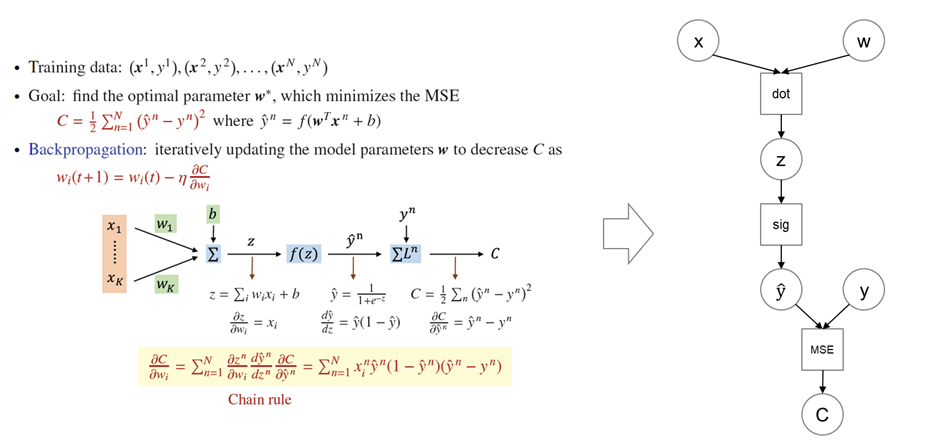

In [4]:
Image.open('./images/img1-3.png')

#### requires_grad

In [87]:
x = torch.tensor([2.])
y = torch.tensor([3.])
z = x + y
print(z)
print(x.requires_grad, y.requires_grad, z.requires_grad)

tensor([5.])
False False False


In [88]:
x.requires_grad = True
y.requires_grad = True

In [89]:
z = x + y
print(z)

tensor([5.], grad_fn=<AddBackward0>)


#### backward(=backpropagation)

In [90]:
def f(x):
    y = x**3 + 2*x**2 + 7
    return y

def g(x):
    y = x**2
    return y

In [91]:
x = torch.tensor(3.0, requires_grad=True)

f_x = f(x)
f_x.backward()
print(f'f_x를 x로 미분한 값 : {x.grad}')

f_x를 x로 미분한 값 : 39.0


In [92]:
x = torch.tensor(3.0, requires_grad=True)

g_x = g(x)
g_x.backward()
print(f'g_x를 x로 미분한 값 : {x.grad}')

g_x를 x로 미분한 값 : 6.0


In [93]:
x = torch.tensor(3.0, requires_grad=True)

g_f_x = g(f(x))
g_f_x.backward()
print(f"g(f(x))를 x로 미분한 값 = f'(3)*g'(f(3)) = 39*2*52 = {x.grad}")

g(f(x))를 x로 미분한 값 = f'(3)*g'(f(3)) = 39*2*52 = 4056.0


#### 선형 회기 계수를 경사하강법으로 업데이트

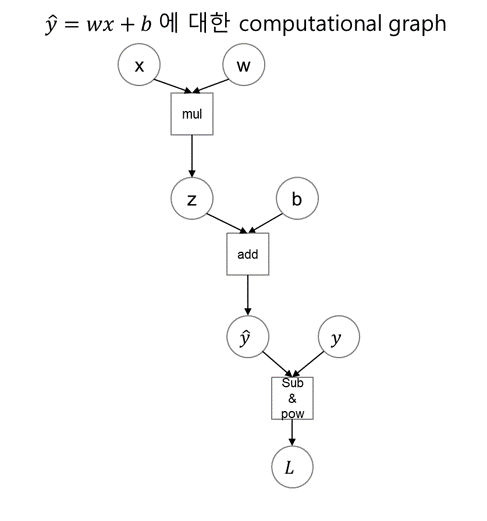

In [5]:
Image.open('./images/img1-4.png')

In [207]:
x = torch.tensor([1,2,3,4,5])
y = torch.tensor([2, 4.2, 5.7, 8.4, 9.5])
w, b = torch.tensor([0.5], requires_grad=True), torch.tensor([4.0], requires_grad=True)

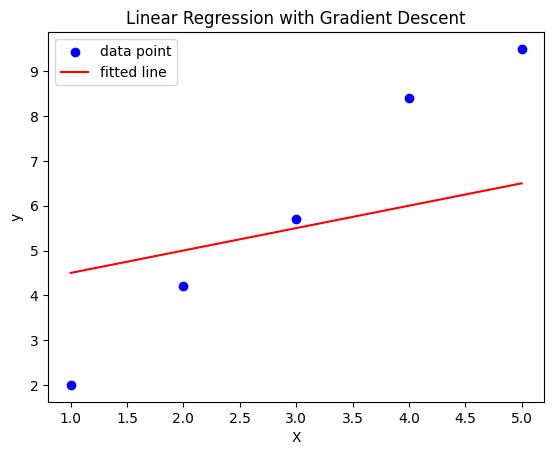

In [208]:
plt.scatter(x,y, color='blue', label='data point')
plt.plot(x, w.detach()*x+b.detach(), color='red', label='fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with Gradient Descent')
plt.show()

In [209]:
# forward: model
z = x*w
print(z)

y_hat = z + b
print(y_hat)

# forward: loss computaion
sub = y - y_hat
print(sub)

loss = torch.pow(sub,2)
print(loss)

# average loss
loss = loss.mean()
print(loss)

tensor([0.5000, 1.0000, 1.5000, 2.0000, 2.5000], grad_fn=<MulBackward0>)
tensor([4.5000, 5.0000, 5.5000, 6.0000, 6.5000], grad_fn=<AddBackward0>)
tensor([-2.5000, -0.8000,  0.2000,  2.4000,  3.0000], grad_fn=<SubBackward0>)
tensor([6.2500, 0.6400, 0.0400, 5.7600, 9.0000], grad_fn=<PowBackward0>)
tensor(4.3380, grad_fn=<MeanBackward0>)


In [210]:
# backward
loss.backward()

print(w.grad)
print(b.grad)

tensor([-8.4400])
tensor([-0.9200])


In [211]:
# update parameter with lr=0.05
print(f'previous parameters: w={w.detach().item()}, b={b.detach().item()}')
#w = w - 0.05*w.grad
#b = b - 0.05*b.grad

w.data.sub_(0.05*w.grad)
b.data.sub_(0.05*b.grad)

print(f'updated parameters: w={w.detach().item():.4f}, b={b.detach().item():.4f}')

previous parameters: w=0.5, b=4.0
updated parameters: w=0.9220, b=4.0460


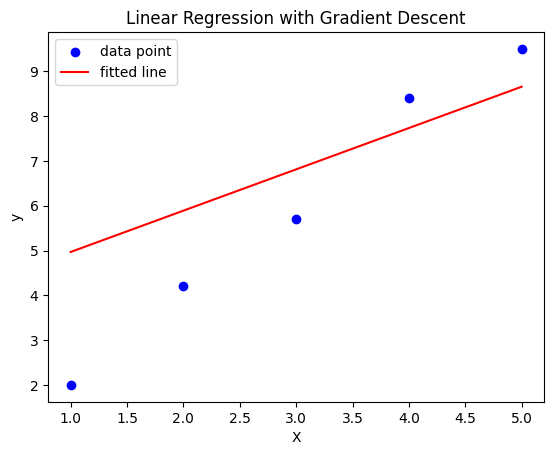

In [212]:
plt.scatter(x,y, color='blue', label='data point')
plt.plot(x, w.detach()*x+b.detach(), color='red', label='fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with Gradient Descent')
plt.show()

#### zero_grad

In [224]:
# backward를 통해 계산된 gradient는 backward를 할 때마다 누적
# 따라서 backward를 한 번 한 뒤, 초기화가 필요

x = torch.FloatTensor([2])
x.requires_grad = True
print(x, '\n')
out = (x+1).pow(2).t() # 미분함수 f'(x) = 2(x+1)
out.backward(retain_graph=True)

print(f"First call\n{x.grad}")
out.backward(retain_graph=True)

print(f"\nSecond call\n{x.grad}")
x.grad.zero_()
out.backward(retain_graph=True)
print(f"\nCall after zeroing gradients\n{x.grad}")

tensor([2.], requires_grad=True) 

First call
tensor([6.])

Second call
tensor([12.])

Call after zeroing gradients
tensor([6.])


#### stop backward

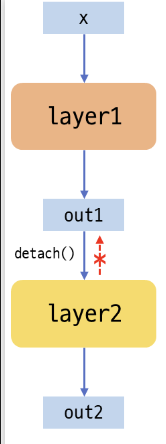

In [6]:
Image.open('./images/img1-5.png')

In [234]:
# backward 단계에서 detach 이전 layer에는 gradient 계산을 멈춤

x = torch.randn(size=(10,)) # 입력변수가 10개인 관측치
y = torch.tensor(1.0)

w1 = torch.randn(size=(10,5),requires_grad=True)
w2 = torch.randn(size=(5,1),requires_grad=True)

In [235]:
torch.matmul(x,w1)

tensor([-1.7907, -0.4543, -0.9810,  5.8149,  0.8775],
       grad_fn=<SqueezeBackward4>)

In [236]:
z = torch.matmul(x,w1)
print(z)
print(z.detach())

y_pred = torch.matmul(z.detach(),w2)
print(y_pred)

loss = (y-y_pred)**2

print(loss)

loss.backward()

print(w1.grad)
print(w2.grad)
print(z.grad)

tensor([-1.7907, -0.4543, -0.9810,  5.8149,  0.8775],
       grad_fn=<SqueezeBackward4>)
tensor([-1.7907, -0.4543, -0.9810,  5.8149,  0.8775])
tensor([-2.3875], grad_fn=<SqueezeBackward4>)
tensor([11.4753], grad_fn=<PowBackward0>)
None
tensor([[ 12.1322],
        [  3.0779],
        [  6.6461],
        [-39.3966],
        [ -5.9453]])
None


#### stop autograd

In [237]:
# backward를 위한 computation graph를 만드는 것은 연산 시간을 늘림
# backward가 필요없는 구간에서는 자동 미분을 끄는 용도 (모델 테스트 단계)

x = torch.randn(size=(10,)) # 입력변수가 10개인 관측치
y = torch.tensor(1.0)

w1 = torch.randn(size=(10,5),requires_grad=True)
w2 = torch.randn(size=(5,1),requires_grad=True)

In [238]:
with torch.no_grad():
    y_pred = torch.matmul((torch.matmul(x,w1)).detach(),w2)

    loss = (y-y_pred)**2

print(y_pred)
print(loss)

tensor([4.7389])
tensor([13.9792])
